In [2]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from ndslib.data import load_data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [3]:
abide_data = load_data("abide2")
abide_data.shape
#abide_data.head()

(1004, 1446)

In [4]:
features = abide_data.filter(like='fs')
features.head()

phenotypes = abide_data.iloc[:, :6]  # first 6  columns of all
# samples are put in a dataframe called phenotypes
phenotypes.head()

,site,subject,age,sex,group,age_resid
0,ABIDEII-KKI_1,29293,8.893151,2.0,1.0,13.642852
1,ABIDEII-OHSU_1,28997,12.000000,2.0,1.0,16.081732
2,ABIDEII-GU_1,28845,8.390000,1.0,2.0,12.866264
3,ABIDEII-NYU_1,29210,8.300000,1.0,1.0,13.698139
4,ABIDEII-EMC_1,29894,7.772758,2.0,2.0,14.772459


In [9]:
# correlation of gender w all the features
corrs = features.corrwith(phenotypes['age'])
print(corrs.sort_values().round(2))
# not really correlated

fsCT_L_5mv_ROI      -0.56
fsCT_L_DVT_ROI      -0.55
fsCT_L_MBelt_ROI    -0.54
fsCT_R_23c_ROI      -0.54
fsCT_L_a9-46v_ROI   -0.54
                     ... 
fsLGI_R_52_ROI       0.20
fsLGI_R_H_ROI        0.28
fsArea_R_H_ROI       0.28
fsLGI_L_H_ROI        0.31
fsArea_L_H_ROI       0.31
Length: 1440, dtype: float64


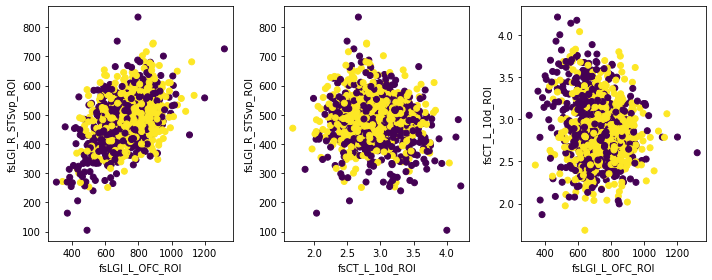

In [8]:
fs_vars = ['fsLGI_L_OFC_ROI', 'fsLGI_R_STSvp_ROI', 'fsCT_L_10d_ROI']
x, y, z = features[fs_vars].values.T

fig, ax = plt.subplots(1, 3)
ax[0].scatter(x, y, c=phenotypes['group'])
ax[0].set(xlabel=fs_vars[0], ylabel=fs_vars[1])
ax[1].scatter(z, y, c=phenotypes['group'])
ax[1].set(xlabel=fs_vars[2], ylabel=fs_vars[1])
ax[2].scatter(x, z, c=phenotypes['group'])
ax[2].set(xlabel=fs_vars[0], ylabel=fs_vars[2])
fig.set_tight_layout("tight")
fig.set_size_inches([10, 4])

In [5]:
gnb = GaussianNB()
y = phenotypes['group']
gnb = gnb.fit(features, y)

print(gnb.score(features, y))


y_pred = gnb.predict(features)
print(classification_report(y, y_pred))

(y_pred == 2).mean()


0.6254980079681275
              precision    recall  f1-score   support

         1.0       0.63      0.44      0.52       463
         2.0       0.62      0.78      0.69       541

    accuracy                           0.63      1004
   macro avg       0.63      0.61      0.61      1004
weighted avg       0.63      0.63      0.61      1004



0.6762948207171314